# **Intrusion Dection**

Lo scopo di questo progetto è quello di addestrare e valutare più modelli in grado di classificare i flussi e riconoscere diversi tipi di attacchi, ovvero modelli utilizzati per task di classificazione multiclasse.

L'insieme di dati utilizzato è il datasset NSL-KDD (KDDTrainClean.csv) che rappresenta un benchmark per sistemi di *Intrusion Detection*. Il dataset contiene informazioni sui flussi di rete verso una infrastruttura IT. Ogni flusso è etichettato come "normale" o associato ad una tipologia di attacco dove la colonna *label* rappresenta l'etichetta. 

In [15]:
# Import delle lebrierie

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Carico il dataset
dataset_path = "./KDDTrainClean.csv"
dataset = pd.read_csv(dataset_path)

# Per vericare che il daset venga caricato correttamente, conto le righe del dataset stesso.
print(len(dataset))

# Ottengo informazioni sul dataset in utilizzo
print(dataset.info())

125973
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64

# Analisi dei Dati 

Per prima cosa si è deciso di fare un'analisi preliminare dei dati all'interno del dataset, analizzando il numero di classi e la loro distribuzione.

In [17]:
class_counts = dataset['label'].value_counts()

# Visualizziamo la distribuzione delle classi
print(class_counts)

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


Si utilizza un grafico a barre per rappresentare la distribuzione.

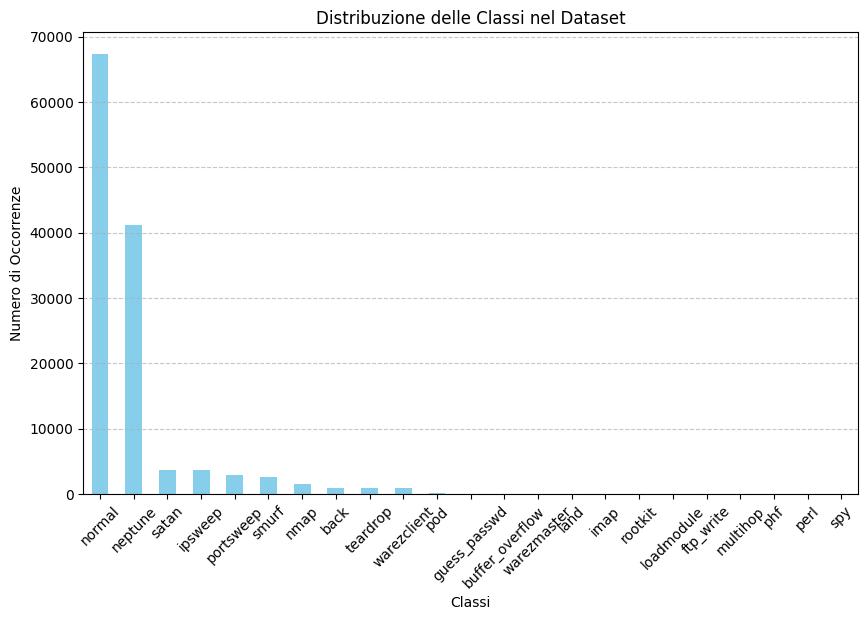

In [18]:
class_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuzione delle Classi nel Dataset')
plt.xlabel('Classi')
plt.ylabel('Numero di Occorrenze')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Si nota come il dataset sia sbilanciato per certe tipologie di classi e questo potrebbe portare a comportamenti di overfitting per quelle particolari classi più comuni che comporterebbe ai modelli di non essere in grado di generalizzare meglio e di non essere in grado di riconoscere i casi più rari che non sono così comuni all'interno del dataset.

Infatti le classi '*guess_passwd*', '*buffer_overflow*', '*warezmaster*', '*land*', '*imap*', '*rootkit*', '*loadmodule*', '*ftp_write*', '*multihop*', '*phf*', '*perl*' e '*spy*' hanno ripettivamente meno di 100 tuple all'interno del dataset, alcune anche meno di 10, e quindi i modello potrebbero non essere in grado di riuscire a classificare correttamente le istanze.

Per cercare di risolvere il problema si potrebbe pensare di introdurre dei dati sintentici, quindi del dataset agumentation; in questo si potrebbe risolvere il problema del ribilanciamento delle classi in modo tale che le classi meno comuni siano in un numero sufficiente così da consentire ai modelli di apprendere in modo efficiente, aggiungendo dei dati sintetici porterebbe migliorare la capacità dei modelli di generalizzare riducendo l'overfitting sulle classi dominanti e si ridurrebbe lo sbilanciamento così da ottenere delle prestazioni migliori.

Ci sono però delle considerazioni da fare sull'aggiunta dei dati sintetici:
- i dati sintentici che vengono aggiunti devono essere realistici e coententi con il dominio del problema, nel caso in non lo fossero potrebbero influire negativamente sulle prestazioni del modello;
- si potrebbe cadere in casi di overfitting perché creando dei dati sintetici per le classi rare potrebbe indurre il modello a memorizzare i pattern artificiali piuttosto che apprendere le caratteristiche generali;
- se i dati sintetici che vengono generati vengono usati sia in fasi di training che in fasi di testing si potrebbe fornire un'immagine ottimistica delle prestazioni dei modelli che vengono costruiti.

Per cercare di utilizzare l'idea di utilizzare i dati sintentici per otteneri i benefici di generalizzazione ma cercando di limitarne l'utilizzo si utilizza un approccio mirato, ovvero si utilizza **Smote (Synthetic Minority Over-sampling Technique)** che genera degli esempi sintetici interpolando dati delle classi reali limitando l'utilizzo solo alle classi rare, ovvero solo alle classi precendentemente citate.